### A few announcements:

1) The final exam will be held on June 4 (Next Thursday). 

2) The exam will cover all the material in 18 lectures and 9 discussion sessions. 

3) You will not be asked to write a Python code. However, you should be familiar with the algorithms we used during the discussion sessions and assignments.

4) The exam will be available on June 4, 8:00 a.m. until June 5, 8 a.m. (all in California time zone).

5) Although the exam will be available for 24 hours, it is time-limited. In other words, you should complete the exam in 45 minutes once you started it. You cannot pause the exam and it will automatically be unavailable after 45 minutes. So, please make sure that you have a stable internet connection before starting the exam.

6) Exam will be accessible on iLearn: https://ilearn.ucr.edu/ -----> Assignments -----> Final Exam. 

7) It is an open-book exam. 



---

8) The final project is due on June 12, 11:59 p.m. You will submit 1) a written report (2-5 pages) which includes a brief description of the project and the data set, data processing and cleaning procedure, plots and figures, explaining the method you used to build a model and evaluating your model's performance. 2) .ipynb file to show your code work.

9) Please let me know if you have any questions. nima.chartab@email.ucr.edu 

---
Now, let's continue our discussion on ANN:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.utils import np_utils
from keras.optimizers import Adam

Load MNIST data

In [5]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

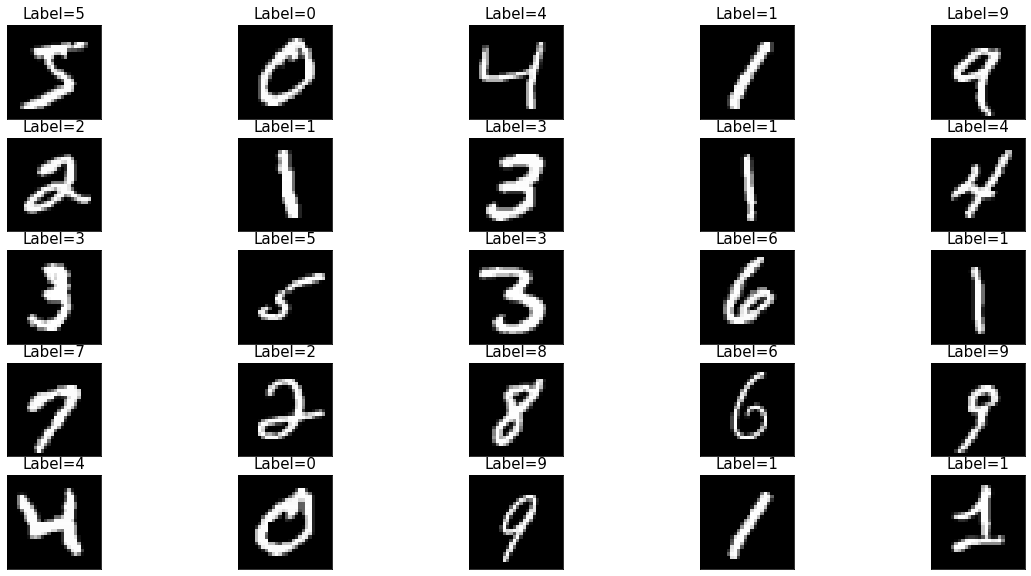

In [8]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title('Label={}'.format(y_train[i]),fontsize=15)
    
    plt.tick_params(axis='both',which='both',bottom=False, left=False,labelbottom=False, labelleft=False)

Build one-hot encoded vectors

In [9]:
y_train=np_utils.to_categorical(y_train)

In [13]:
y_test=np_utils.to_categorical(y_test)

Build an NN model:

In [16]:
model=Sequential()

model.add(Flatten())

model.add(Dense(200,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 2.3722 - accuracy: 0.8804 - val_loss: 0.4270 - val_accuracy: 0.8995
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.3455 - accuracy: 0.9215 - val_loss: 0.3277 - val_accuracy: 0.9203
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2640 - accuracy: 0.9345 - val_loss: 0.2571 - val_accuracy: 0.9420
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2495 - accuracy: 0.9407 - val_loss: 0.2742 - val_accuracy: 0.9353
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2319 - accuracy: 0.9443 - val_loss: 0.3509 - val_accuracy: 0.9378
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2135 - accuracy: 0.9498 - val_loss: 0.2720 - val_accuracy: 0.9411
Epoch 7/10
60000/60000 [==============================] - 5s 91us/st

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
print('Number of params for the second layer:', 784*200+200)
print('Number of params for the last layer:', 10*200+10)


Number of params for the second layer: 157000
Number of params for the last layer: 2010


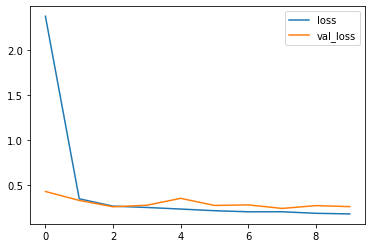

In [24]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

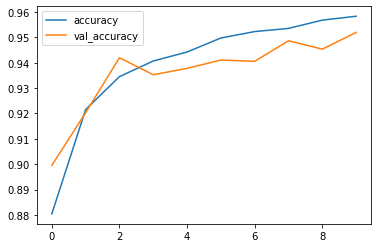

In [26]:
history[['accuracy','val_accuracy']].plot()

Can we do better?

In [34]:
X_train=np_utils.normalize(X_train,axis=1)
X_test=np_utils.normalize(X_test,axis=1)

In [38]:
model=Sequential()

model.add(Flatten())

model.add(Dense(200,activation='relu'))

#To avoid overfitting we want that 20% of the weights do not get updated in each iteration
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3104 - accuracy: 0.9116 - val_loss: 0.1565 - val_accuracy: 0.9550
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1421 - accuracy: 0.9580 - val_loss: 0.1167 - val_accuracy: 0.9663
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1016 - accuracy: 0.9693 - val_loss: 0.0909 - val_accuracy: 0.9737
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0794 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 7/10
60000/60000 [==============================] - 6s 1

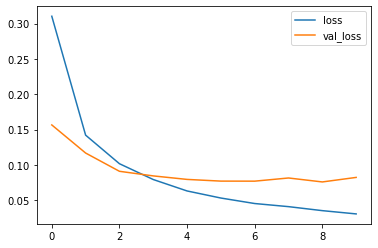

In [40]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

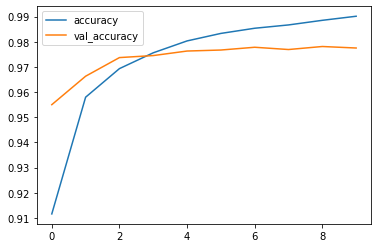

In [42]:
history[['accuracy','val_accuracy']].plot()

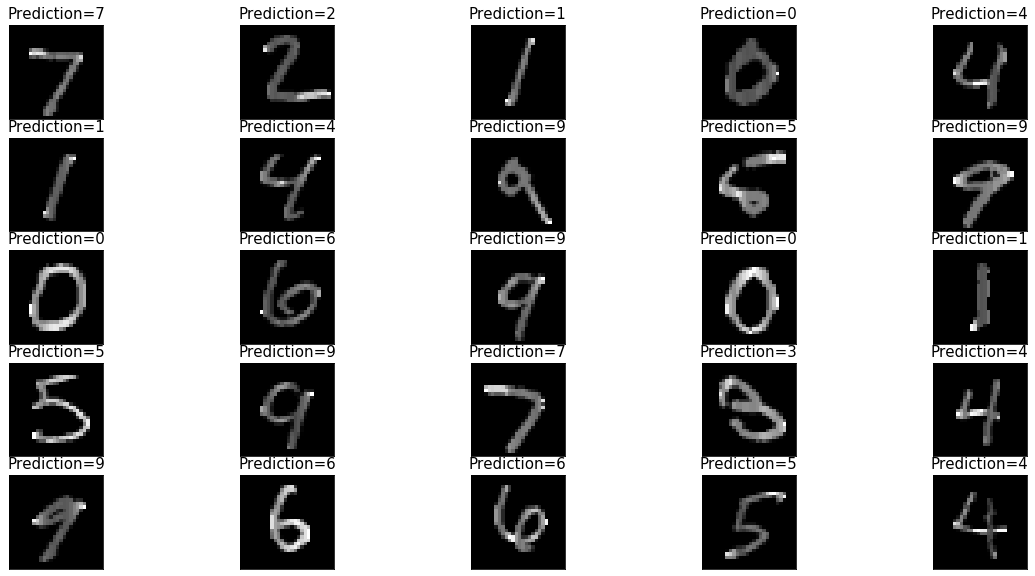

In [52]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title('Prediction={}'.format(np.argmax(model.predict([X_test])[i])),fontsize=15)
    
    plt.tick_params(axis='both',which='both',bottom=False, left=False,labelbottom=False, labelleft=False)

### Convolutional neural network(CNN):

In [54]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [55]:
X_train.shape

(60000, 28, 28, 1)

In [56]:
from keras.layers import Conv2D, MaxPooling2D

In [60]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1611 - accuracy: 0.9514 - val_loss: 0.0753 - val_accuracy: 0.9757
Epoch 2/3
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0603 - val_accuracy: 0.9797
Epoch 3/3
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0631 - val_accuracy: 0.9806


In [62]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               2163400   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 2,166,050
Trainable params: 2,166,050
Non-trainable params: 0
_________________________________________________________________


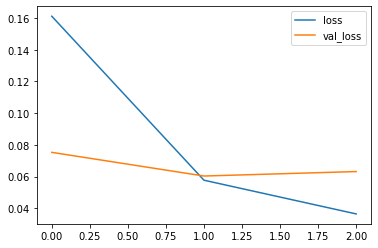

In [63]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

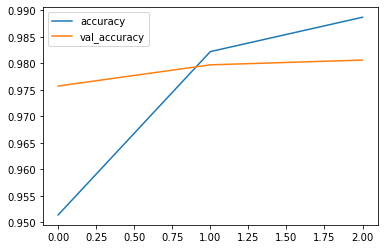

In [64]:
history[['accuracy','val_accuracy']].plot()

We have reached accuracy of 98% in 3 epochs.

### TensorBoard: a powerful visualization tool

In [65]:
from keras.callbacks import TensorBoard

In [67]:
import os
%load_ext tensorboard

In [68]:
os.mkdir('log_session9')

In [71]:
log_dir='log_session9/'

In [72]:
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [73]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=3,callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1639 - accuracy: 0.9506 - val_loss: 0.0716 - val_accuracy: 0.9776
Epoch 2/3
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 3/3
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0596 - val_accuracy: 0.9802


In [76]:
%tensorboard --logdir log_session9